In [2]:
# Importamos las librerías necesarias

import pandas as pd  # Librería para manipulación y análisis de datos
import numpy as np  # Librería para operaciones numéricas y matemáticas
import matplotlib.pyplot as plt  # Librería para crear gráficos
import seaborn as sns  # Librería para visualización de datos, basada en matplotlib
from sklearn import linear_model  # Módulo de Scikit-learn para realizar modelos de regresión lineal

In [3]:
# Importar los datos como un DataFrame de Pandas (df)
# Leemos el archivo CSV que contiene los datos y lo almacenamos en la variable 'df'
df = pd.read_csv("data/MLR_House_data.csv")

# Mostramos el DataFrame para ver los primeros registros y verificar que los datos se han cargado correctamente
df

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


## Matriz de correlación - Correlation Matrix

In [4]:
# Calculamos la matriz de correlación para el DataFrame
# La matriz de correlación muestra la relación entre las variables numéricas en el conjunto de datos
correlation_matrix = df.corr()

# Mostrar la matriz de correlación en la consola
print(correlation_matrix)

              area  bedrooms       age     price
area      1.000000  0.600014 -0.224033  0.863330
bedrooms  0.600014  1.000000 -0.823265  0.789369
age      -0.224033 -0.823265  1.000000 -0.621277
price     0.863330  0.789369 -0.621277  1.000000


<Axes: >

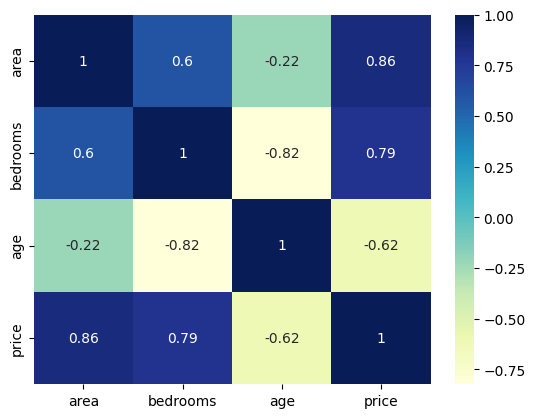

In [5]:
# Generamos un mapa de calor para visualizar la matriz de correlación
# 'annot=True' muestra los valores de correlación en cada celda del mapa de calor
# 'cmap' define la paleta de colores para el gráfico (en este caso, "YlGnBu" para un gradiente de amarillo a azul)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

## Visualize the relationship between the independet variables and dependent variable

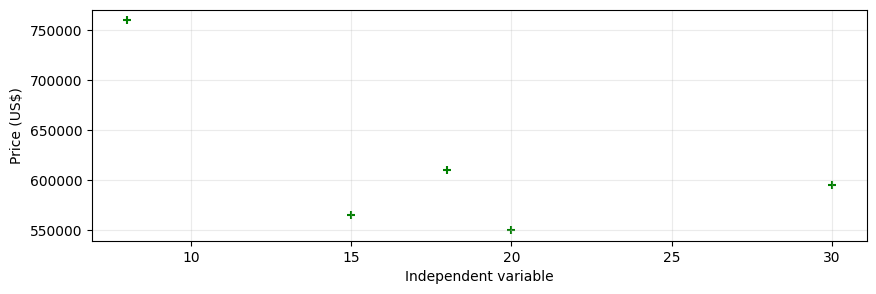

In [8]:
def histo(column):
    # Configuramos el tamaño de la figura del gráfico
    plt.figure(figsize=(10, 3))

    # Creamos un diagrama de dispersión para visualizar la relación entre el área y el precio
    # 'df.area' representa el eje x (área) y 'df.price' el eje y (precio)
    # 'color' define el color de los puntos y 'marker' el estilo del marcador
    plt.scatter(column, df.price, color='green', marker='+')

    plt.grid(alpha=0.25)

    # Etiquetas de los ejes para proporcionar contexto al gráfico
    plt.xlabel('Independent variable')  # Etiqueta para el eje x
    plt.ylabel('Price (US$)')    # Etiqueta para el eje y

histo(df.age) #Cambiar la variable 'area', 'bedrooms', 'age'

# LINEAR REGRESSION MODEL

In [10]:
# Crear una instancia del modelo de regresión lineal
reg = linear_model.LinearRegression()

# Ajustar el modelo a los datos. 'df[['area', 'age', 'bedrooms']]' es el conjunto de características (en este caso, el área, age y bedrooms),
# y 'df.price' es la variable objetivo (el precio).
reg.fit(df[['area', 'age', 'bedrooms']], df.price)

LinearRegression()

In [11]:
# Crear un DataFrame con el valor de entrada
#3300 es un ejemplo de un inmueble de 3300 pies cuadrados, 40 años y 3 bedrooms
input_data = pd.DataFrame([[3000, 40, 3]], columns=['area', 'age', 'bedrooms'])

# Hacer la predicción
prediction = reg.predict(input_data)

print(prediction)
print(f"El precio para un inmueble de $3000 pies cuadrados, 40 años y 3 bedrooms es: ${prediction}")

[444400.]
El precio para un inmueble de $3000 pies cuadrados, 40 años y 3 bedrooms es: $[444400.]


## Analysis

    Formula de regresión lineal multiple: y = m1*x1 + m2*x2 + ... mn*xn + b

y = Dependent variable - Response - Outcome <br>
x = Independent variable - Predictor (n independent variables) <br>
m = coeficient (n coeficients) <br>
b = intercept

In [12]:
# Obtenemos el coeficiente de la regresión lineal
# 'm' representa la pendiente de la recta (coeficiente)
m = reg.coef_  

# Obtenemos el término independiente de la regresión lineal
# 'b' representa el intercepto de la recta (valor en el eje y cuando x=0)
b = reg.intercept_

### Ejemplo Cálculo 1

In [39]:
# Calculamos el precio estimado para un inmueble de 3000 pies cuadrados, 40 años y 3 bedrooms
# Usamos la fórmula de la recta: precio = m1 * área + m2 * años + m3 * bedrooms+ b
precio1 = m[0] * 3000 + m[1]*40 + m[2]*3 + b

# Mostramos el precio estimado
precio1

np.float64(444399.99999999994)

### Ejemplo Cálculo 2

In [14]:
# Calculamos el precio estimado para un inmueble de 5000 pies cuadrados, 30 años y 5 cuartos
# Usamos la fórmula de la recta: precio = m * área + b
precio2 = m[0] * 5000 + m[1]*30 + m[2]*5 + b

# Mostramos el precio estimado
print(precio2)

735100.0
